In [1]:
# importing the required libraries
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [16]:
# Importing the dataset
df = pd.read_csv("phishing_dataset.csv")
df.pop("id")
df["Result"].replace(-1, 0, inplace=True)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [17]:
# Separating the data into X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set, Validation set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

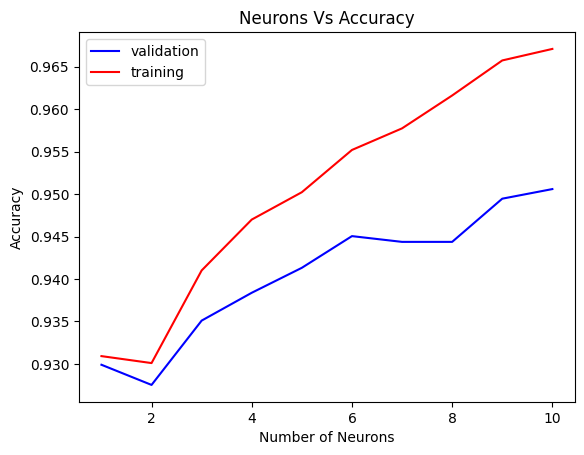

The best number of neurons is 10


In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

validation_accuracy, training_accuracy = [], []
for neurons in range(1, 11):
    accuracy_v, accuracy_t = [], []
    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        clf = MLPClassifier(hidden_layer_sizes=[neurons], max_iter=1000, random_state=1, activation="relu")
        clf.fit(X_train_cv, y_train_cv)

        accuracy_v.append(accuracy_score(y_test_cv, clf.predict(X_test_cv)))
        accuracy_t.append(accuracy_score(y_train_cv, clf.predict(X_train_cv)))
    training_accuracy.append(np.mean(accuracy_t))
    validation_accuracy.append(np.mean(accuracy_v))

plt.title("Neurons Vs Accuracy")
plt.plot(range(1, 11), validation_accuracy, color="blue", label="validation")
plt.plot(range(1, 11), training_accuracy, color="red", label="training")
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# The best number of neurons
best_neurons = np.argmax(validation_accuracy) + 1
print("The best number of neurons is", best_neurons)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

validation_accuracy, training_accuracy = [], []
for degree in range(1, 4):
    poly = PolynomialFeatures(degree)
    accuracy_v, accuracy_t = [], []
    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

        X_train_poly = poly.fit_transform(X_train_cv)
        X_test_poly = poly.transform(X_test_cv)
        
        clf = MLPClassifier(hidden_layer_sizes=[10], max_iter=1000, random_state=1, activation="relu")
        clf.fit(X_train_poly, y_train_cv)

        accuracy_t.append(accuracy_score(y_train_cv, clf.predict(X_train_poly)))
        accuracy_v.append(accuracy_score(y_test_cv, clf.predict(X_test_poly)))
    
    training_accuracy.append(np.mean(accuracy_t))
    validation_accuracy.append(np.mean(accuracy_v))



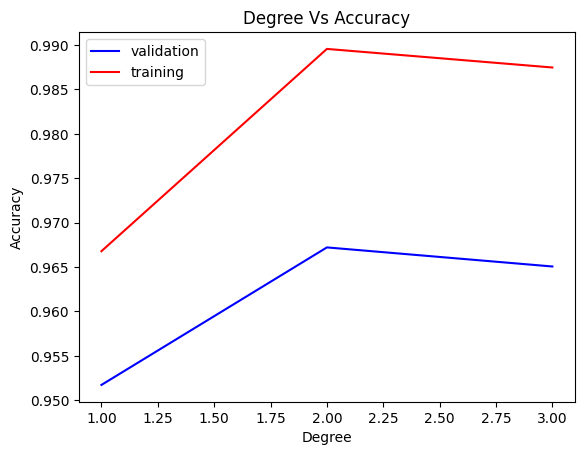

The best polynomial transformation degree is 2


In [6]:
plt.title("Degree Vs Accuracy")
plt.plot(range(1, 4), validation_accuracy, color="blue", label="validation")
plt.plot(range(1, 4), training_accuracy, color="red", label="training")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# The best degree
best_degree = np.argmax(validation_accuracy) + 1
print("The best polynomial transformation degree is", best_degree)

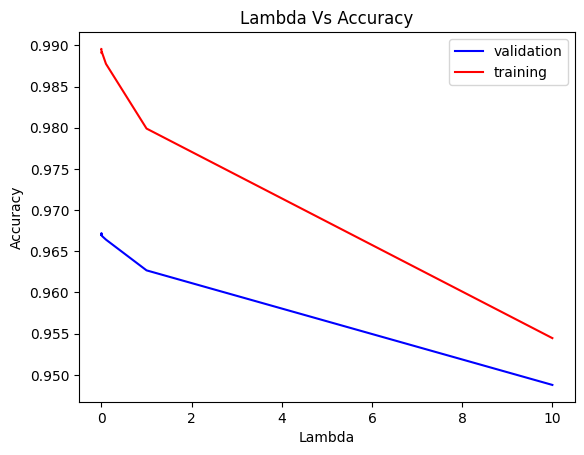

The best polynomial transformation degree is 0.0001


In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
poly = PolynomialFeatures(best_degree)

validation_accuracy, training_accuracy = [], []
for alpha in lambdas:
    accuracy_v, accuracy_t = [], []
    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

        X_train_poly = poly.fit_transform(X_train_cv)
        X_test_poly = poly.transform(X_test_cv)

        clf = MLPClassifier(hidden_layer_sizes=[10], max_iter=1000, random_state=1, activation="relu", alpha=alpha)
        clf.fit(X_train_poly, y_train_cv)

        accuracy_t.append(accuracy_score(y_train_cv, clf.predict(X_train_poly)))
        accuracy_v.append(accuracy_score(y_test_cv, clf.predict(X_test_poly)))
    
    training_accuracy.append(np.mean(accuracy_t))
    validation_accuracy.append(np.mean(accuracy_v))

plt.title("Lambda Vs Accuracy")
plt.plot(lambdas, validation_accuracy, color="blue", label="validation")
plt.plot(lambdas, training_accuracy, color="red", label="training")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# The best degree
best_lambda = np.argmax(validation_accuracy)
print("The best polynomial transformation degree is", lambdas[best_lambda])

In [8]:
clf_relu = MLPClassifier(hidden_layer_sizes=[10], max_iter=1000, random_state=1, activation="relu", alpha=best_lambda)
clf_logistic = MLPClassifier(hidden_layer_sizes=[10], max_iter=1000, random_state=1, activation="logistic", alpha=best_lambda)

In [ ]:
# resetting variables
logistic_df = df.copy(deep=True)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

clf_relu.fit(X_train, y_train)
clf_logistic.fit(X_train, y_train)

In [12]:
print("ReLU Test Accuracy:", accuracy_score(y_test, clf_relu.predict(X_test)))
print("Logistic Test Accuracy:", accuracy_score(y_test, clf_logistic.predict(X_test)))

ReLU Test Accuracy: 0.9556761646313885
Logistic Test Accuracy: 0.9412030755314338


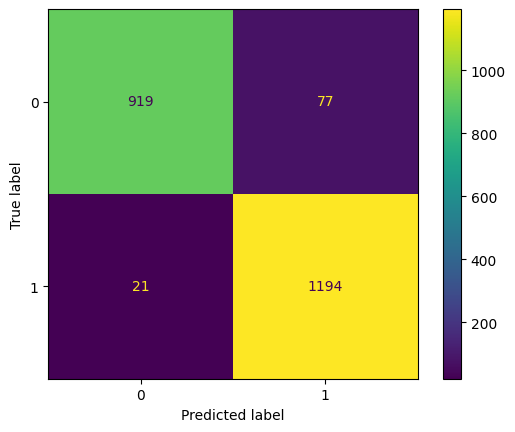

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf_relu.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [15]:
from sklearn.metrics import f1_score

print("F1 Score:", f1_score(y_test, predictions))

F1 Score: 0.9605792437650845
